In [1]:
##Step 0: Import Libraries

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
##Step 1: Read the Dataset

df=pd.read_csv("Train.csv")
df1 = df.copy(deep=True)
df1.shape


(8068, 11)

In [3]:
df1.head(1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
round(df1.describe())

,ID,Age,Work_Experience,Family_Size
count,8068.0,8068.0,7239.0,7733.0
mean,463479.0,43.0,3.0,3.0
std,2595.0,17.0,3.0,2.0
min,458982.0,18.0,0.0,1.0
25%,461241.0,30.0,0.0,2.0
50%,463472.0,40.0,1.0,3.0
75%,465744.0,53.0,4.0,4.0
max,467974.0,89.0,14.0,9.0


In [6]:
df1.head(1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D


In [7]:
##Step 2: Clean Data
#columns:
df1.columns = df1.columns.str.strip().str.lower()
df1.head(1)

,id,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size,var_1,segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D


In [8]:
df1.dtypes

id                   int64
gender              object
ever_married        object
age                  int64
graduated           object
profession          object
work_experience    float64
spending_score      object
family_size        float64
var_1               object
segmentation        object
dtype: object

In [9]:
df1.var_1.describe()

count      7992
unique        7
top       Cat_6
freq       5238
Name: var_1, dtype: object

In [10]:
##Step 2: Clean Data
#Rows:
#Check Null Value
#Check Formats
#Check Duplicates
#Check Data Ranges
#Drop un-necessary columns
df1.drop('id', axis=1 , inplace=True)
df1.head(1)

,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size,var_1,segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D


In [11]:
df1.duplicated().sum()

417

In [12]:
df1.duplicated(keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
8063    False
8064    False
8065     True
8066    False
8067    False
Length: 8068, dtype: bool

In [13]:
 df2= df1.drop_duplicates(keep='last')
df2

,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size,var_1,segmentation
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [14]:
df2.duplicated().sum()

0

In [15]:
df2.isnull().sum()

gender               0
ever_married       140
age                  0
graduated           78
profession         124
work_experience    806
spending_score       0
family_size        332
var_1               76
segmentation         0
dtype: int64

In [16]:
round((df2.isnull().sum() / df2.shape[0])* 100, 1)

gender              0.0
ever_married        1.8
age                 0.0
graduated           1.0
profession          1.6
work_experience    10.5
spending_score      0.0
family_size         4.3
var_1               1.0
segmentation        0.0
dtype: float64

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7651 entries, 1 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7651 non-null   object 
 1   ever_married     7511 non-null   object 
 2   age              7651 non-null   int64  
 3   graduated        7573 non-null   object 
 4   profession       7527 non-null   object 
 5   work_experience  6845 non-null   float64
 6   spending_score   7651 non-null   object 
 7   family_size      7319 non-null   float64
 8   var_1            7575 non-null   object 
 9   segmentation     7651 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 657.5+ KB


In [18]:
#work_experience  was removed as majority of data was missing 


df_clean =df2.fillna({
    
         'ever_married':df2.ever_married.mode()[0],
          'profession' :df2.profession.mode()[0],
            'graduated':df2.graduated.mode()[0],
            'family_size':df2.family_size.mean(),
           "work_experience":df2.work_experience.mean(),
            'var_1':df2.var_1.mode()[0],
})

In [19]:
df_clean.isnull().sum()

gender             0
ever_married       0
age                0
graduated          0
profession         0
work_experience    0
spending_score     0
family_size        0
var_1              0
segmentation       0
dtype: int64

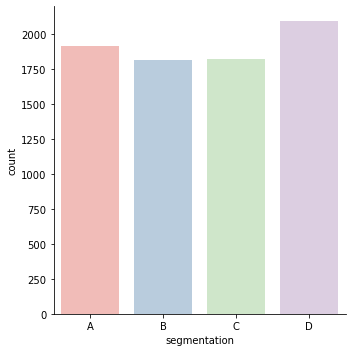

In [20]:
##Step 3: Explore Data (EDA)

 #Visulazing the distibution of the Target
# My target is segmentation

sns.catplot (x = 'segmentation', data = df_clean, kind='count', palette = 'Pastel1');

<AxesSubplot:xlabel='age', ylabel='Count'>

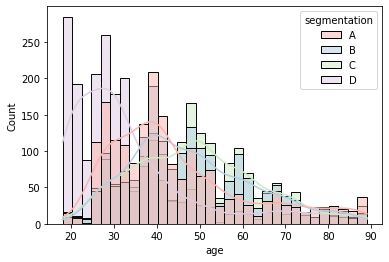

In [21]:
sns.histplot(x = 'age', data = df_clean, hue='segmentation', palette = 'Pastel1', kde= True)

In [22]:
df_clean.head(1)

,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size,var_1,segmentation
1,Female,Yes,38,Yes,Engineer,2.728415,Average,3.0,Cat_4,A


In [23]:
x={'A':1,'B':2,'C':3,'D':4}
df_clean.segmentation=df_clean.segmentation.map(x)

In [24]:
#Step 4 Modeling
#Step 4.1: Preprocessing
#Create dummy cols for Categorical cols
#Create X & Y
#Split Data into Train vs Test
#Standerdize the Dataset

df1 = pd.get_dummies(df_clean, drop_first=True)
df1

,age,work_experience,family_size,segmentation,gender_Male,ever_married_Yes,graduated_Yes,profession_Doctor,profession_Engineer,profession_Entertainment,...,profession_Lawyer,profession_Marketing,spending_score_High,spending_score_Low,var_1_Cat_2,var_1_Cat_3,var_1_Cat_4,var_1_Cat_5,var_1_Cat_6,var_1_Cat_7
1,38,2.728415,3.0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,67,1.000000,1.0,2,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,67,0.000000,2.0,2,1,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,40,2.728415,6.0,1,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
5,56,0.000000,2.0,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22,0.000000,7.0,4,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8064,35,3.000000,4.0,4,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8065,33,1.000000,1.0,4,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8066,27,1.000000,4.0,2,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
# Create X & Y

x = df1.drop(columns ='segmentation',axis=1)
y = df1.segmentation

In [26]:
from sklearn.model_selection  import train_test_split
from sklearn.metrics import recall_score, f1_score, precision_score


x_train , x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [28]:
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.linear_model import LogisticRegression

# 1. Create object 

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
print("The Model Accuracy is {:.2f}%,\
      Recall is {:.2f}%, Percision is {:.2f}%, \
      F1-Score is {:.2f}% ".format(lr_model.score(x_test, y_test)*100,
                                    recall_score(y_test,y_pred)*100 ,
                                   precision_score(y_test,y_pred)*100, 
                                  f1_score(y_test,y_pred) *100
))

C:\Users\RT\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].